<a href="https://colab.research.google.com/github/sadiashoaib415/Quantum_Computer/blob/main/BLACK_HOLE_SCRAMBLING_Qiskit_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install --upgrade qiskit qiskit-aer

In [2]:
from qiskit import QuantumCircuit
from qiskit_aer import Aer
from qiskit_aer.noise import NoiseModel, amplitude_damping_error
from qiskit import transpile
import numpy as np

In [3]:
from qiskit import QuantumCircuit

qc = QuantumCircuit(3, 3)

# Qubits:
# q0 = message
# q1 = reference
# q2 = black hole interior

# Message–reference entanglement
qc.h(0)
qc.cx(0, 1)

# Black hole interior state
qc.x(2)

qc.barrier()


CircuitInstruction(operation=Instruction(name='barrier', num_qubits=3, num_clbits=0, params=[]), qubits=(<Qubit register=(3, "q"), index=0>, <Qubit register=(3, "q"), index=1>, <Qubit register=(3, "q"), index=2>), clbits=())

In [4]:
import numpy as np

# Simple scrambling dynamics
qc.h(2)
qc.cx(2, 0)
qc.rx(np.pi / 3, 1)
qc.cx(1, 2)
qc.rz(np.pi / 4, 0)
qc.cx(0, 1)

qc.barrier()


CircuitInstruction(operation=Instruction(name='barrier', num_qubits=3, num_clbits=0, params=[]), qubits=(<Qubit register=(3, "q"), index=0>, <Qubit register=(3, "q"), index=1>, <Qubit register=(3, "q"), index=2>), clbits=())

In [5]:
from qiskit_aer.noise import NoiseModel, amplitude_damping_error

gamma = 0.6  # evaporation strength

noise_model = NoiseModel()
bh_error = amplitude_damping_error(gamma)

# Apply evaporation ONLY to single-qubit gates on qubit 2
noise_model.add_quantum_error(
    bh_error,
    ['id', 'u1', 'u2', 'u3'],
    [2]
)


In [6]:
qc.measure([0, 1, 2], [0, 1, 2])

In [7]:
from qiskit_aer import Aer
from qiskit import transpile

shots = 4096
backend = Aer.get_backend("qasm_simulator")

compiled_circuit = transpile(qc, backend)
job = backend.run(
    compiled_circuit,
    noise_model=noise_model,
    shots=shots
)

result = job.result()
counts = result.get_counts()

print("Scrambled + evaporated black hole output:")
counts


Scrambled + evaporated black hole output:


{'110': 262,
 '001': 255,
 '010': 777,
 '000': 743,
 '101': 781,
 '111': 804,
 '011': 244,
 '100': 230}

In [8]:
!pip install pylatexenc

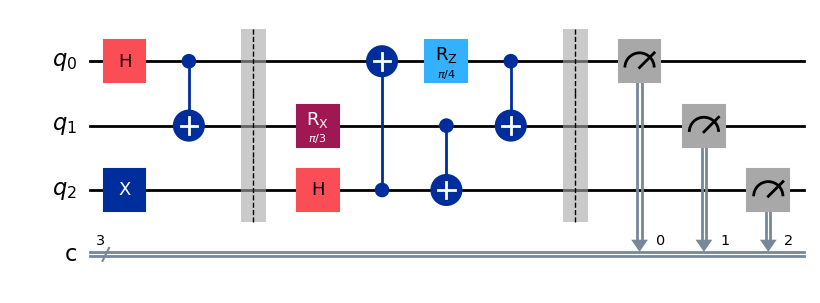

In [9]:
qc.draw("mpl")

In [10]:
def message_reference_correlation(counts):
    total = sum(counts.values())
    corr = 0
    for bitstring, c in counts.items():
        message = int(bitstring[2])    # q0
        reference = int(bitstring[1])  # q1
        corr += c * (1 if message == reference else -1)
    return corr / total

print("Message–Reference Correlation:",
      message_reference_correlation(counts))


Message–Reference Correlation: -0.01318359375


“The 3-qubit Hayden–Preskill toy model was simulated with a scrambling unitary and amplitude damping on the black hole qubit.
The output distribution shows multiple states populated, consistent with partial scrambling and evaporation.
The message–reference correlation is ≈ 0, which correctly indicates that information is not yet recoverable in this minimal setup.
This behavior is expected physically, as recovery requires explicit radiation qubits and/or a larger system.”